In [12]:
import pandas as pd
import numpy as np
import zipfile
from sklearn.preprocessing import StandardScaler
import pylab 
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
# !kaggle competitions download -c playground-series-s4e7
# with zipfile.ZipFile('playground-series-s4e7.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [23]:
df = pd.read_csv('train.csv')

## Check for Missing value

In [24]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [25]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [26]:
df['Region_Code'].unique()

array([35. , 28. , 14. ,  1. , 15. , 47. , 45. ,  8. , 11. ,  3. , 10. ,
       12. , 37. , 50. , 30. , 46. , 29. , 16. , 26. , 25. , 41. , 48. ,
        7. ,  4. , 24. , 36. , 33. ,  2. ,  9. , 27. , 18. , 43. , 49. ,
       17. , 13. , 38. ,  6. , 21. , 23. ,  0. , 19. ,  5. , 39. , 44. ,
       20. , 40. , 22. , 32. , 42. , 31. , 34. , 51. , 52. , 39.2])

In [27]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [28]:
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64

count    1.150480e+07
mean     3.046137e+04
std      1.645475e+04
min      2.630000e+03
25%      2.527700e+04
50%      3.182400e+04
75%      3.945100e+04
max      5.401650e+05
Name: Annual_Premium, dtype: float64


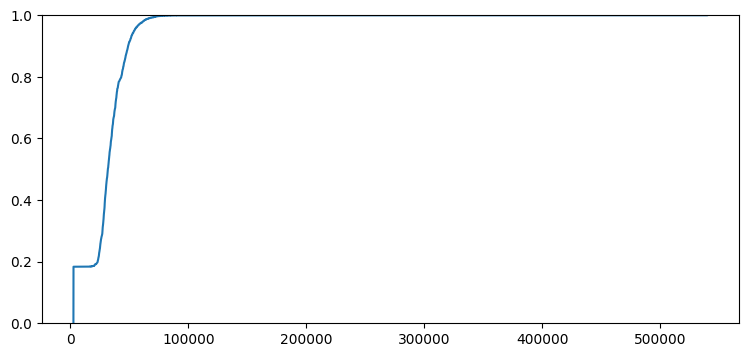

In [29]:
print(df['Annual_Premium'].describe())
fig, ax = plt.subplots(figsize=(9, 4))
ax.ecdf(df['Annual_Premium'], label="CDF")

In [35]:
df['Policy_Sales_Channel'].value_counts()

Policy_Sales_Channel
152.0    4165625
26.0     2432851
124.0    2264083
160.0     640314
156.0     316664
          ...   
111.0       1132
107.0       1128
47.0        1121
121.0       1113
65.0        1027
Name: count, Length: 75, dtype: int64

In [31]:
df.drop(df[(df['Annual_Premium'] > 100000)].index, inplace=True)

In [36]:
df['Vintage'].describe()

count    1.148771e+07
mean     1.639004e+02
std      7.997807e+01
min      1.000000e+01
25%      9.900000e+01
50%      1.660000e+02
75%      2.320000e+02
max      2.990000e+02
Name: Vintage, dtype: float64

In [38]:
def standardize_feature(f):
    f = f.to_numpy().reshape(-1, 1)
    scaler = StandardScaler()
    return scaler.fit(f).transform(f)


def clean_data(df):

    # Drop Duplicates
    df.drop_duplicates(inplace=True)
    print('Duplicates dropped')

    df['Female'] = df.apply(lambda x: x['Gender'] == 'Female', axis=1)
    df.drop('Gender', axis=1, inplace=True)
    print('Dummy Gender')

    # Ein einzelner Region-Code der als Float gespeichert ist.
    df.drop(df[df['Region_Code'] == 39.2].index, inplace=True)
    print('Region Code Ausreißer dropped')

    # Vehicle Age ist kodiert als Strin: "1-2 Year", "< 1 Year" und "> 2 Years"
    one_hot = pd.get_dummies(df['Vehicle_Age'], prefix='Vehicle_Age')
    df = df.join(one_hot)
    df.drop('Vehicle_Age', axis=1, inplace=True)
    print('Vehicle Age Dummy eingefügt')

    df['Damage'] = df.apply(lambda x: x['Vehicle_Damage'] == 'Yes', axis=1)
    df.drop('Vehicle_Damage', axis=1, inplace=True)
    print('Vehicle Damage Dummy eingefügt')

    # Alle Einträge mit Prämien über 100k droppen
    df.drop(df[(df['Annual_Premium'] > 100000)].index, inplace=True)
    print('Prämien-Aureißer dropped')

    df['Min_Premium'] = df.apply(lambda x: x['Annual_Premium'] == 2630, axis=1)
    print('Dummy für Min. Prämie eingefügt')


    value_counts = df['Policy_Sales_Channel'].value_counts()
    df = df[df['Policy_Sales_Channel'].isin(value_counts[value_counts >= 1000].index)]
    print('Irrelevante Sales Channel dropped')

    one_hot = pd.get_dummies(df['Policy_Sales_Channel'], prefix='Channel')
    df = df.join(one_hot)
    print('Dummy für Sales Channel eingefügt')

    return df

In [ ]:
df = clean_data(df) # Dauert ca. 7 Minuten

In [40]:
df.to_csv('df_train_clean.csv') # Dauert ca. 7 Minuten